In [ ]:
import pandas as pd 
import mysql.connector
import csv

# Connexion au serveur MySQL sans spécifier une base de données
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="Underoath13!"
)

mycursor = mydb.cursor()

# Création de la base de données
mycursor.execute("CREATE DATABASE titanicDataBase")

# Fermeture de la connexion
mycursor.close()
mydb.close()

# Maintenant, connectez-vous à la base de données nouvellement créée
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="Underoath13!",
  database="titanicDataBase"
)
mycursor = mydb.cursor()
mycursor.execute("""
CREATE TABLE titanic_table (
    PassengerId INT PRIMARY KEY,
    Survived VARCHAR(255),
    Pclass VARCHAR(255),
    Name VARCHAR(255),
    Sex VARCHAR(255),
    Age INT,
    SibSp INT,
    Parch INT,
    Ticket VARCHAR(255),
    Fare VARCHAR(255),
    Cabin VARCHAR(255),
    Embarked VARCHAR(255)
)
""")

In [8]:
# connexion a la base de donnees

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="Underoath13!",
  database="titanicDataBase"
)
mycursor = mydb.cursor()

#ouverture du file csv 

with open("titanic_dataset.csv", 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Sauter l'en-tête si nécessaire

    for row in csv_reader:
    # Check if 'Age' value is empty and replace it with None (NULL) or a default value
       age_index = 5  # Assuming 'Age' is the 6th column in your CSV
       row = list(row)  # Convert tuple to list to allow modifications
       row[age_index] = None if row[age_index] == '' else row[age_index]

       sql = "INSERT INTO titanic_table (PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
       mycursor.execute(sql, tuple(row))  # Convert back to tuple before executing


    # Valider les insertions
    mydb.commit()

# Fermer la connexion
mycursor.close()
mydb.close()

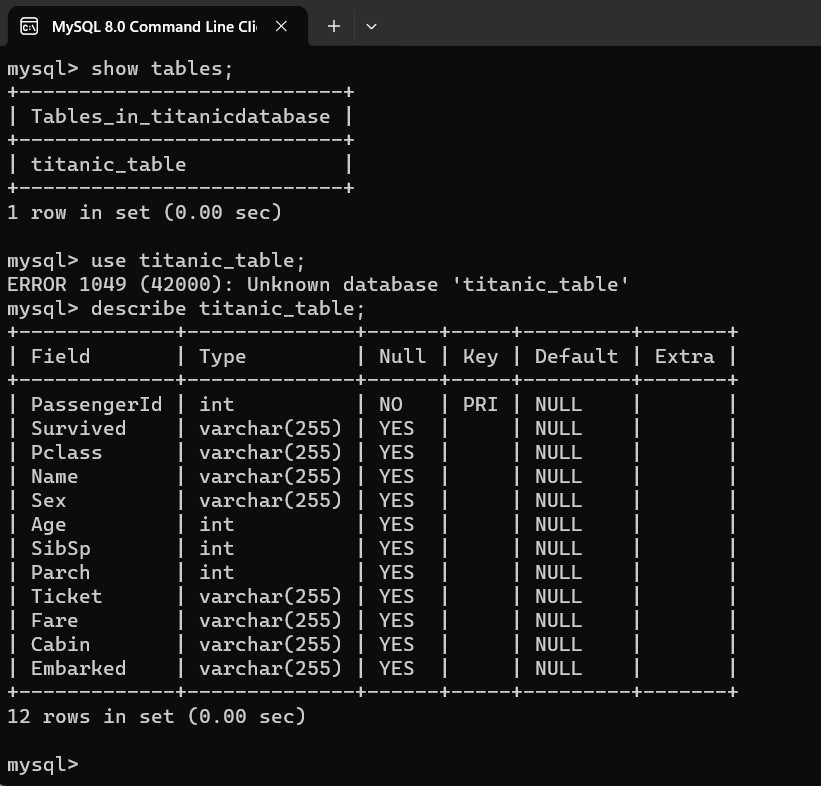

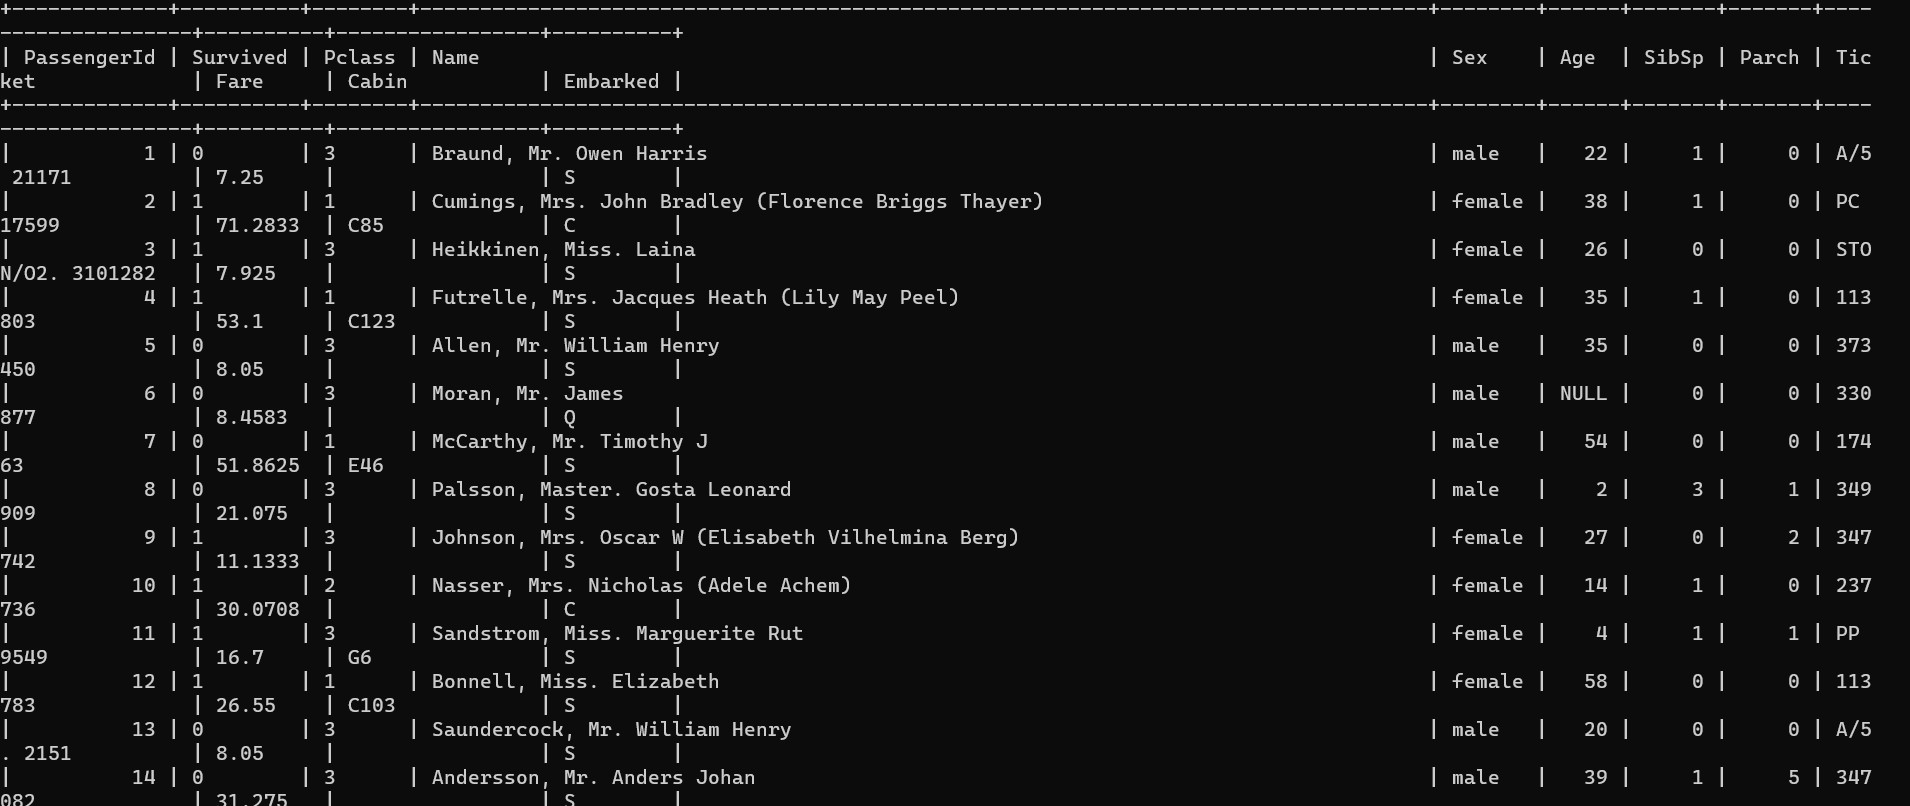

In [1]:
from IPython.display import Image, display

listOfImageNames = ['image1.jpg',
                    'image2.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName))